# HW1: LeNet-5 with Post-training Quantization
[LeNet](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) is considered to be the first ConvNet.
We are going to implement a neural architecture similar to LeNet and train it with [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset.

Before we start, you may check this [Tensorspace-LeNet](https://tensorspace.org/html/playground/lenet.html) to play with LeNet and get familiar with this neural architecture.

![image](https://production-media.paperswithcode.com/methods/LeNet_Original_Image_48T74Lc.jpg)
Ref.: LeCun et al., Gradient-Based Learning Applied to Document Recognition, 1998a

<font color='red'>Name: 陳力豪 Student ID: 107061272</font>

## 1. Initial Setup

We are going to implement and train this neural network with PyTorch. 
If you are not familiar with PyTorch, check the [official tutorail](https://pytorch.org/tutorials/beginner/basics/intro.html)

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


### 1.1 Loading dataset
Load training and test data from the MNIST dataset.

In [2]:
transform = transforms.Compose(
    [
     transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))
    ])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8,
                                         shuffle=False, num_workers=2)

### 1.2 Defining the Neural Network 
Define a simple CNN that classifies MNIST images.

In [3]:
from nnutils import LeNet
net = LeNet().to(device)

### 1.3 Question: Profiling the Neural Architecture by TorchInfo
Torchinfo provides information complementary to what is provided by print(your_model) in PyTorch, similar to Tensorflow's `model.summary()` API to view the visualization of the model, which is helpful while debugging your network. Check this [link](https://github.com/TylerYep/torchinfo#how-to-use) about how to use TorchInfo by `summary()` and fill in the TODO in the following cell. You should get the result similar to the table below:

```
==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
==========================================================================================
LeNet                                    --                        --
...
...
==========================================================================================
Total params: ...
...
Estimated Total Size (MB): ...
==========================================================================================
```

Ref.: https://github.com/TylerYep/torchinfo

Please read *B. LeNet-5* in the [original paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) and answer the following questions in the report.
1. What is the type (convolution, pooling, fully-connected layer, etc.), input activation size, output activation size, and activation function (if any) of each layer?
2. What is the difference between this neural architecture and the LeNet-5 in the [original paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)?
3. Could we replace the 3rd conv, the conv in c5, with a fully connected layer?

### 1.3 Answers
<font color='red'>Write your answers here.</font>
1. <br />

C1：<br />
Type: convolution, <br />
Input activation size (channel, width, height) = (1, 32, 32)  <br />
Output activation size (channel, width, height) = (6, 28, 28)  <br />
Activation function = ReLU <br />

S2：<br />
Type: Subsampling, <br />
Input activation size (channel, width, height) = (6, 28, 28)  <br />
Output activation size (channel, width, height) = (6, 14, 14)  <br />
Activation function = sigmoid <br />

C3：<br />
Type: convolution, <br />
Input activation size (channel, width, height) = (6, 14, 14)  <br />
Output activation size (channel, width, height) = (16, 10, 10)  <br />
Activation function = sigmoid <br />

S4：<br />
Type: Subsampling, <br />
Input activation size (channel, width, height) = (16, 10, 10)  <br />
Output activation size (channel, width, height) = (16, 5, 5)  <br />
Activation function = sigmoid <br />

C5：<br />
Type: convolution, <br />
Input activation size (channel, width, height) = (16, 5, 5)  <br />
Output activation size (channel, width, height) = (120, 1, 1)  <br />
Activation function = ReLu <br />

F6：<br />
Type: fully-connected, <br />
Input activation size (channel, width, height)) = (120, 1, 1)  <br />
Output activation size (output) = (84)  <br />
Activation function = hyperbolic tangent <br />

Output：<br />
Type: Guassuan Connection, <br />
Input activation size (output) = (84)  <br />
Output activation size (output) = (10)  <br />
Activation function = RBF <br />


2. <br />
此次作業的架構把LeNet-5中的Subsampling layers換成Maxpooling layers，並且作業中的activation function均換成ReLus function。

    
    
3. <br />
不行。因為如果LeNet-5的input size變大，而其他都保持不變的話，最後feature map的尺寸會比1*1還要大。

In [4]:
from torchinfo import summary
summary(net, input_size=(4,1,32,32), verbose=0)
# TODO

Layer (type:depth-idx)                   Output Shape              Param #
LeNet                                    --                        --
├─Sequential: 1-1                        [4, 6, 28, 28]            --
│    └─Conv2d: 2-1                       [4, 6, 28, 28]            150
│    └─ReLU: 2-2                         [4, 6, 28, 28]            --
├─Sequential: 1-2                        [4, 6, 14, 14]            --
│    └─MaxPool2d: 2-3                    [4, 6, 14, 14]            --
├─Sequential: 1-3                        [4, 16, 10, 10]           --
│    └─Conv2d: 2-4                       [4, 16, 10, 10]           2,400
│    └─ReLU: 2-5                         [4, 16, 10, 10]           --
├─Sequential: 1-4                        [4, 16, 5, 5]             --
│    └─MaxPool2d: 2-6                    [4, 16, 5, 5]             --
├─Sequential: 1-5                        [4, 120, 1, 1]            --
│    └─Conv2d: 2-7                       [4, 120, 1, 1]            48,000
│    └─

### 1.4 Training and Testing the Neural Network
Train this CNN on the training dataset (this may take a few moments).
* Check how to save and load the model
    * https://pytorch.org/tutorials/beginner/saving_loading_models.html
    * Save:
        ```
        torch.save(model.state_dict(), PATH)
        ```
    * Load:
        ```
        model = TheModelClass(*args, **kwargs)
        model.load_state_dict(torch.load(PATH))
        model.eval()
        ```
* After training the model, we will save it as `lenet.pt`.
* You should comment out `train(net, trainloader, device)` and uncomment `net.load_state_dict(torch.load('lenet.pt'))` before submitting your homework.
    * Also, reloading the model from `lenet.pt` can save your time if there is something wrong and you need to restart and run all.

If you get `ModuleNotFoundError: No module named 'nnutils'` when running the following cell, you should check if the `nnutils` folder exists. `nnutils` and `homework1.ipynb` should be placed in the same directory.

In [5]:
from nnutils import train, test

#train(net, trainloader, device)
net.load_state_dict(torch.load('lenet.pt'))
score = test(net, testloader, None, device)

print('Accuracy of the network on the test images: {}%'.format(score))
torch.save(net.state_dict(), 'lenet.pt')

Accuracy of the network on the test images: 98.48%


## 2. Post-training Quantization
### 2.1 Question: Visualizing Weights

We have flattened all vectors for you by `tensor.view(-1)`.

Plot a histogram of each weight and show the total range and 3-sigma range for each weight. Fill in the TODO in the following cell.

hint: `np.histogram()` and `plt.hist()`

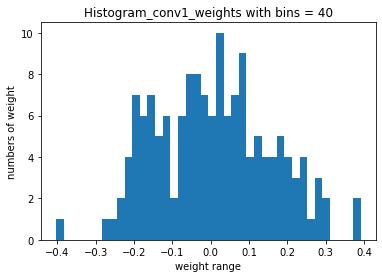

For conv1 layer, the total range [Min , Max] = [-0.4029906988143921 , 0.39087480306625366]
For conv1 layer, the 3-sigma range = [-0.44051605463027954 , 0.4588123559951782]


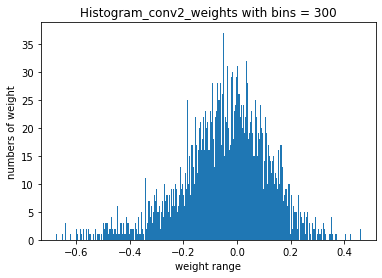

For conv2 layer, the total range [Min , Max] = [-0.6737098097801208 , 0.4603506922721863]
For conv2 layer, the 3-sigma range = [-0.5434123873710632 , 0.4522389769554138]


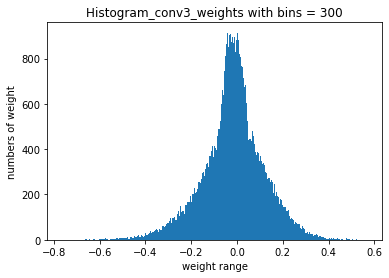

For conv3 layer, the total range [Min , Max] = [-0.7624775171279907 , 0.5675882697105408]
For conv3 layer, the 3-sigma range  = [-0.4228246808052063 , 0.38866716623306274]


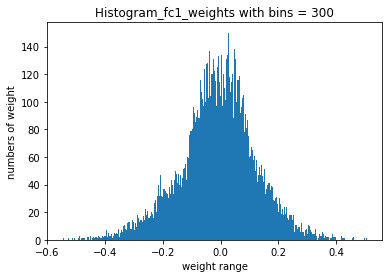

For fc1 layer, the total range [Min , Max] = [-0.5474773049354553 , 0.5072317123413086]
For fc1 layer, the 3-sigma range  = [-0.4032284617424011 , 0.385051429271698]


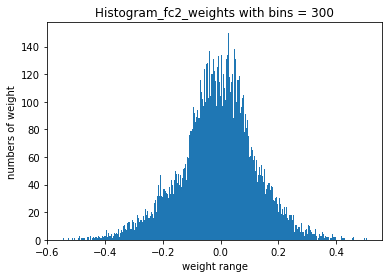

For fc2 layer, the total range [Min , Max] = [-1.0900074243545532 , 0.21261565387248993]
For fc2 layer, the 3-sigma range  = [-0.7065575122833252 , 0.4234582483768463]


In [6]:
import matplotlib.pyplot as plt

conv1_weights = net.c1[0].weight.data.cpu().view(-1)
conv2_weights = net.c3[0].weight.data.cpu().view(-1)
conv3_weights = net.c5[0].weight.data.cpu().view(-1)
fc1_weights = net.f6[0].weight.data.cpu().view(-1)
fc2_weights = net.output[0].weight.data.cpu().view(-1)

# TODO
##### bin代表區間 hist代表每個區間內的數（在柱狀圖上的值）

#############################################
hist_c1, bins_c1 = np.histogram(conv1_weights, bins=40)
plt.hist(bins_c1[:-1], bins_c1, weights=hist_c1)
plt.xlabel("weight range")
plt.ylabel("numbers of weight")
plt.title("Histogram_conv1_weights with bins = 40") 
plt.show()

c1_weight_min = min(conv1_weights)
c1_weight_max = max(conv1_weights)
print("For conv1 layer, the total range [Min , Max] = [{} , {}]".format(c1_weight_min, c1_weight_max))

c1_weight_avg = torch.mean(conv1_weights)
c1_weight_std = torch.std(conv1_weights)
print("For conv1 layer, the 3-sigma range = [{} , {}]"
        .format(c1_weight_avg-3*c1_weight_std, c1_weight_avg+3*c1_weight_std))
#############################################
hist_c2, bins_c2 = np.histogram(conv2_weights, bins=300)
plt.hist(bins_c2[:-1], bins_c2, weights=hist_c2)
plt.xlabel("weight range")
plt.ylabel("numbers of weight")
plt.title("Histogram_conv2_weights with bins = 300") 
plt.show()

c2_weight_min = min(conv2_weights)
c2_weight_max = max(conv2_weights)
print("For conv2 layer, the total range [Min , Max] = [{} , {}]".format(c2_weight_min, c2_weight_max))

c2_weight_avg = torch.mean(conv2_weights)
c2_weight_std = torch.std(conv2_weights)
print("For conv2 layer, the 3-sigma range = [{} , {}]"
        .format(c2_weight_avg-3*c2_weight_std, c2_weight_avg+3*c2_weight_std))
#############################################
hist_c3, bins_c3 = np.histogram(conv3_weights, bins=300)
plt.hist(bins_c3[:-1], bins_c3, weights=hist_c3)
plt.xlabel("weight range")
plt.ylabel("numbers of weight")
plt.title("Histogram_conv3_weights with bins = 300") 
plt.show()

c3_weight_min = min(conv3_weights)
c3_weight_max = max(conv3_weights)
print("For conv3 layer, the total range [Min , Max] = [{} , {}]".format(c3_weight_min, c3_weight_max))

c3_weight_avg = torch.mean(conv3_weights)
c3_weight_std = torch.std(conv3_weights)
print("For conv3 layer, the 3-sigma range  = [{} , {}]"
        .format(c3_weight_avg-3*c3_weight_std, c3_weight_avg+3*c3_weight_std))
#############################################
hist_fc1, bins_fc1 = np.histogram(fc1_weights, bins=300)
plt.hist(bins_fc1[:-1], bins_fc1, weights=hist_fc1)
plt.xlabel("weight range")
plt.ylabel("numbers of weight")
plt.title("Histogram_fc1_weights with bins = 300") 
plt.show()

fc1_weight_min = min(fc1_weights)
fc1_weight_max = max(fc1_weights)
print("For fc1 layer, the total range [Min , Max] = [{} , {}]".format(fc1_weight_min, fc1_weight_max))

fc1_weight_avg = torch.mean(fc1_weights)
fc1_weight_std = torch.std(fc1_weights)
print("For fc1 layer, the 3-sigma range  = [{} , {}]"
        .format(fc1_weight_avg-3*fc1_weight_std, fc1_weight_avg+3*fc1_weight_std))
#############################################
hist_fc2, bins_fc2 = np.histogram(fc1_weights, bins=300)
plt.hist(bins_fc2[:-1], bins_fc2, weights=hist_fc2)
plt.xlabel("weight range")
plt.ylabel("numbers of weight")
plt.title("Histogram_fc2_weights with bins = 300") 
plt.show()

fc2_weight_min = min(fc2_weights)
fc2_weight_max = max(fc2_weights)
print("For fc2 layer, the total range [Min , Max] = [{} , {}]".format(fc2_weight_min, fc2_weight_max))

fc2_weight_avg = torch.mean(fc2_weights)
fc2_weight_std = torch.std(fc2_weights)
print("For fc2 layer, the 3-sigma range  = [{} , {}]".format(fc2_weight_avg-3*fc2_weight_std, fc2_weight_avg+3*fc2_weight_std))

### 2.2 Question:  Quantizing Weights
Computation of convolution or fully-connected layer can be expressed as
$$W\times I = O$$
where $W$ is the weight tensor, $I$ is the input tensor, and $O$ is the output tensor.
Let $n_w$ be the scaling factor. We have $$W_q\times I =n_w W \times I\approx n_w O$$ where $W_q$ is the quantized 8-bit signed integer weight tensor.

Fill in the TODO in `quantized_weights()` of `quantize_layer_weights()`.If you’ve done everything correctly, the accuracy degradation should be negligible.
1. What is $n_w$? Explain how you get it.
2. What is the accuracy degradation? \
Show both relative error and absolute error when the true value is the accuracy we get before performing any quantization.

### 2.2 Answers
<font color='red'>Write your answers here.</font>  <br />
1. <br />
$n_w$ 是要使用來 Quantize $W$ 的 $scale$ $factor$。<br />

&emsp;&emsp; 取得方法：

&emsp;&emsp; 由於要實作symmetric quantization，首先找出$|Weight|_{max}$，接著根據要quantization的bits數選擇參數$B$，<br />

&emsp;&emsp; 最後依照 $n_w = \frac {2^B-1} {2|Weight|_{max}}$ 求得此結果。


2. 
$$ Ture \quad value = 98.48\% \quad Experiment \quad value = 98.48\%$$ <br />
$$ Relative\_error = | \frac {98.48\%-98.48\%} {98.48\%} | * 100\%  = 0\%$$ <br />
$$ Absolute\_error = | 98.48\%-98.48\% | = 0\% $$ <br />

In [7]:
score = test(net, testloader, None, device)
print('Accuracy of the network on the test images: {}%'.format(score))

Accuracy of the network on the test images: 98.48%


In [8]:
from nnutils import copy_model, quantize_layer_weights
net_q2 = copy_model(net)
quantize_layer_weights(net_q2, device)
score = test(net_q2, testloader, None, device)
print('Accuracy of the network after quantizing all weights: {}%'.format(score))

Accuracy of the network after quantizing all weights: 98.48%


### 2.3 Question: Visualizing Activations
Plot histograms of the input images and the output activations of each operation and answer the following questions in the report. Fill in the TODO in the following cell.
1. Discuss any observations about the distribution of these activations.
2. Record the range of the values, as well as their 3-sigma range (the difference between μ + 3σ and μ − 3σ).

### 2.3 Answers
<font color='red'>Write your answers here.</font><br />
1. <br />

&emsp;&emsp;除了最後的output層之外，每一層的輸出(輸入) activations 的分佈值大概都落在-1~2之間。由於各activations的dynamic range都很小，如果使用 FP-32 來表示的話，在硬體會增加很多不必要的運算負擔，所以我覺得很適合將各層的值映射到[-128, 127]之間，在之後實作硬體時用 INT-8 的運算來提升效率。<br />

&emsp;&emsp; 最後會經過一層Fully Connected Layer，而此層的輸出數量為10個，故在最後一張output_activation的圖上可以看到，柱狀圖縱軸上的值加起來剛好就是等於10，符合我們對此架構的預期。




2 .<br />
&emsp;&emsp; Input Activations :<br />
&emsp;&emsp; For input_activations, the total range [Min , Max] = [-1.0 , 0.9843137264251709]<br />
&emsp;&emsp; For input_activations, the 3-sigma range = [-2.484403610229492 , 1.0379424095153809]<br />

&emsp;&emsp; C1_output_activations Activations :<br />
&emsp;&emsp; For c1_output_activations, the total range [Min , Max] = [0.0 , 2.3606197834014893]<br />
&emsp;&emsp; For c1_output_activations, the 3-sigma range = [-0.9625270366668701 , 1.3123798370361328]<br />

&emsp;&emsp; C3_output_activations Activations :<br />
&emsp;&emsp; For c3_output_activations, the total range [Min , Max] = [0.0 , 3.69258713722229]<br />
&emsp;&emsp; Forc3_output_activations, the 3-sigma range = [-1.215368390083313 , 1.4713600873947144]<br />

&emsp;&emsp; C5 _output_activations Activations :<br />
&emsp;&emsp; For c5_output_activations, the total range [Min , Max] = [0.0 , 11.398408889770508]<br />
&emsp;&emsp; For c5_output_activations, the 3-sigma range = [-4.753542423248291 , 5.787658214569092]<br />

&emsp;&emsp; F6_output_activations Activations :<br />
&emsp;&emsp; For f6_output_activations, the total range [Min , Max] = [0.0 , 8.764769554138184]<br />
&emsp;&emsp; For f6_output_activations, the 3-sigma range = [-5.145752429962158 , 6.852258205413818]<br />

&emsp;&emsp; Output_output_activations Activations :<br />
&emsp;&emsp; For output_output_activations, the total range [Min , Max] = [-14.359149932861328 , 5.721643447875977]<br />
&emsp;&emsp; For output_output_activations, the 3-sigma range = [-28.67724609375 , 12.44088363647461]<br />


In [9]:
net_q3 = copy_model(net)

def visualizeActivations(module, input, output):
    if module.profile_activations == True:
        module.inAct = input[0].cpu().view(-1)
        module.outAct = output[0].cpu().view(-1)
    
for name, model in net_q3.named_children():
    model.profile_activations = True
    model.register_forward_hook(visualizeActivations)
net_q3.eval()
with torch.no_grad():
    input = trainset[0][0].unsqueeze(0)
    _ = net_q3(input.to(device))  
for name, model in net_q3.named_children(): model.profile_activations = False 

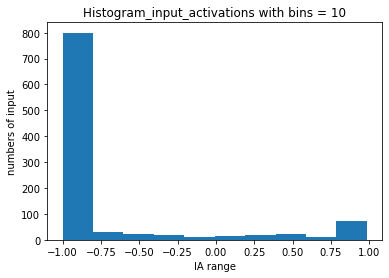

For input_activations, the total range [Min , Max] = [-1.0 , 0.9843137264251709]
For input_activations, the 3-sigma range = [-2.484403610229492 , 1.0379424095153809]


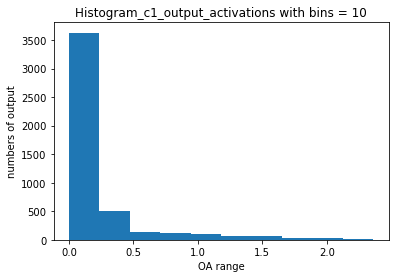

For c1_output_activations, the total range [Min , Max] = [0.0 , 2.3606197834014893]
For c1_output_activations, the 3-sigma range = [-0.9625270366668701 , 1.3123798370361328]


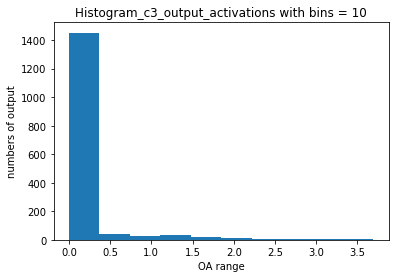

For c3_output_activations, the total range [Min , Max] = [0.0 , 3.69258713722229]
Forc3_output_activations, the 3-sigma range = [-1.215368390083313 , 1.4713600873947144]


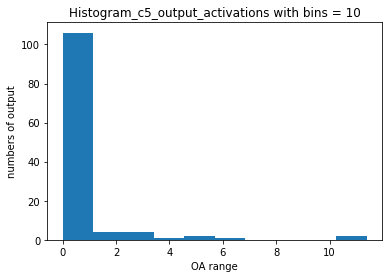

For c5_output_activations, the total range [Min , Max] = [0.0 , 11.398408889770508]
For c5_output_activations, the 3-sigma range = [-4.753542423248291 , 5.787658214569092]


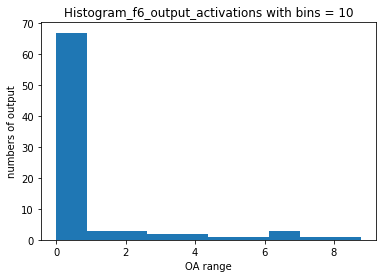

For f6_output_activations, the total range [Min , Max] = [0.0 , 8.764769554138184]
For f6_output_activations, the 3-sigma range = [-5.145752429962158 , 6.852258205413818]


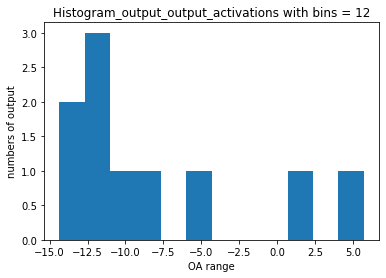

For output_output_activations, the total range [Min , Max] = [-14.359149932861328 , 5.721643447875977]
For output_output_activations, the 3-sigma range = [-28.67724609375 , 12.44088363647461]


In [10]:
input_activations = net_q3.c1.inAct
c1_output_activations = net_q3.c1.outAct
c3_output_activations = net_q3.c3.outAct
c5_output_activations = net_q3.c5.outAct
f6_output_activations = net_q3.f6.outAct
output_output_activations = net_q3.output.outAct

# TODO
#############################################
hist_output, bins_output = np.histogram(input_activations, bins=10)
plt.hist(bins_output[:-1], bins_output, weights=hist_output)
plt.xlabel("IA range")
plt.ylabel("numbers of input")
plt.title("Histogram_input_activations with bins = 10") 
plt.show()

input_activations_min = min(input_activations)
input_activations_max = max(input_activations)
print("For input_activations, the total range [Min , Max] = [{} , {}]".format(input_activations_min, input_activations_max))

input_activations_avg = torch.mean(input_activations)
input_activations_std = torch.std(input_activations)
print("For input_activations, the 3-sigma range = [{} , {}]"
        .format(input_activations_avg-3*input_activations_std, input_activations_avg+3*input_activations_std))
#############################################
hist_c1, bins_c1 = np.histogram(c1_output_activations, bins=10)
plt.hist(bins_c1[:-1], bins_c1, weights=hist_c1)
plt.xlabel("OA range")
plt.ylabel("numbers of output")
plt.title("Histogram_c1_output_activations with bins = 10") 
plt.show()

c1_output_activations_min = min(c1_output_activations)
c1_output_activations_max = max(c1_output_activations)
print("For c1_output_activations, the total range [Min , Max] = [{} , {}]".format(c1_output_activations_min, c1_output_activations_max))

c1_output_activations_avg = torch.mean(c1_output_activations)
c1_output_activations_std = torch.std(c1_output_activations)
print("For c1_output_activations, the 3-sigma range = [{} , {}]"
        .format(c1_output_activations_avg-3*c1_output_activations_std, c1_output_activations_avg+3*c1_output_activations_std))
#############################################
hist_c3, bins_c3 = np.histogram(c3_output_activations, bins=10)
plt.hist(bins_c3[:-1], bins_c3, weights=hist_c3)
plt.xlabel("OA range")
plt.ylabel("numbers of output")
plt.title("Histogram_c3_output_activations with bins = 10") 
plt.show()

c3_output_activations_min = min(c3_output_activations)
c3_output_activations_max = max(c3_output_activations)
print("For c3_output_activations, the total range [Min , Max] = [{} , {}]".format(c3_output_activations_min, c3_output_activations_max))

c3_output_activations_avg = torch.mean(c3_output_activations)
c3_output_activations_std = torch.std(c3_output_activations)
print("Forc3_output_activations, the 3-sigma range = [{} , {}]"
        .format(c3_output_activations_avg-3*c3_output_activations_std, c3_output_activations_avg+3*c3_output_activations_std))
#############################################
hist_c5, bins_c5 = np.histogram(c5_output_activations, bins=10)
plt.hist(bins_c5[:-1], bins_c5, weights=hist_c5)
plt.xlabel("OA range")
plt.ylabel("numbers of output")
plt.title("Histogram_c5_output_activations with bins = 10") 
plt.show()

c5_output_activations_min = min(c5_output_activations)
c5_output_activations_max = max(c5_output_activations)
print("For c5_output_activations, the total range [Min , Max] = [{} , {}]".format(c5_output_activations_min, c5_output_activations_max))

c5_output_activations_avg = torch.mean(c5_output_activations)
c5_output_activations_std = torch.std(c5_output_activations)
print("For c5_output_activations, the 3-sigma range = [{} , {}]"
        .format(c5_output_activations_avg-3*c5_output_activations_std, c5_output_activations_avg+3*c5_output_activations_std))
#############################################
hist_f6, bins_f6 = np.histogram(f6_output_activations, bins=10)
plt.hist(bins_f6[:-1], bins_f6, weights=hist_f6)
plt.xlabel("OA range")
plt.ylabel("numbers of output")
plt.title("Histogram_f6_output_activations with bins = 10") 
plt.show()

f6_output_activations_min = min(f6_output_activations)
f6_output_activations_max = max(f6_output_activations)
print("For f6_output_activations, the total range [Min , Max] = [{} , {}]".format(f6_output_activations_min, f6_output_activations_max))

f6_output_activations_avg = torch.mean(f6_output_activations)
f6_output_activations_std = torch.std(f6_output_activations)
print("For f6_output_activations, the 3-sigma range = [{} , {}]"
        .format(f6_output_activations_avg-3*f6_output_activations_std, f6_output_activations_avg+3*f6_output_activations_std))
#############################################
hist_output, bins_output = np.histogram(output_output_activations, bins=12)
plt.hist(bins_output[:-1], bins_output, weights=hist_output)
plt.xlabel("OA range")
plt.ylabel("numbers of output")
plt.title("Histogram_output_output_activations with bins = 12") 
plt.show()

output_output_activations_min = min(output_output_activations)
output_output_activations_max = max(output_output_activations)
print("For output_output_activations, the total range [Min , Max] = [{} , {}]".format(output_output_activations_min, output_output_activations_max))

output_output_activations_avg = torch.mean(output_output_activations)
output_output_activations_std = torch.std(output_output_activations)
print("For output_output_activations, the 3-sigma range = [{} , {}]"
        .format(output_output_activations_avg-3*output_output_activations_std, output_output_activations_avg+3*output_output_activations_std))

### 2.4 Question:  Quantizing Activations
The output of conv in `c1` can be $$W_{conv1}* I=O_{conv1}.$$
Let the scaling factor of the quantized input matrix $I$ be $n_I$, the scaling factor of the quantized weight matrix $W_{conv1}$ 
be $n_{W_{c1}}$, and the scaling factor of the output matrix $O_{conv1}$ be $n_{O_{c1}}$.  
$$W_{conv1_q}* I_q = (n_{W_{c1}}W_{conv1})* (n_II)\approx (n_{W_{c1}}n_I)O_{conv1}$$
where $W_{conv1_q}$ is the quantized 8-bit signed integer weight tensor and $I_q$ is the quantized 8-bit signed integer input activation tensor.

On the other hand,
$$O_{conv1_q} \approx n_{O_{c1}}O_{conv1}$$
where $O_{conv1_q}$ is the quantized 8-bit signed integer output activation tensor "without" considering quantized weight tensor and quantized input activation tensor.

Since we're doing post-training quantization, we can get $n_I$, $n_{W_{c1}}$, and $n_{O_{c1}}$ first and do the other calculations for quantization.

Answer the following questions in the report.

1. How to compute $n_I$, $n_{W_{c1}}$, and $n_{O_{c1}}$? 
2. The ture quantized output activation tensor is depend on $W_{conv1_q}$ and $I_q$, so we cannot simply apply $n_{O_{c1}}$ on the output of $W_{conv1_q}* I_q$ to quantize the output activation. Derive an equation for the quantized output of the conv in c1 after quantizing activation and weight with  $n_I$, $n_{W_{c1}}$, and $n_{O_{c1}}$ and show the scaling factor $S_1$ of it. \
(hint: quantize $O$ in $W_{conv1_q}* I_q = O$ and get $W_{conv1_q}* I_q \approx S_1O = O_q$ where $O_q$ is the quantized 8-bit signed integer output.)
3. Derive an equation for the quantized output of the conv in `c3` after quantizing activation and weight.
4. Show the general form of the equation for layer $l$ to calculate the scaling factor $S_l$ of the output activation.
   * You may use notations like $W_l, O_l$ to indicate the weight and output activation of layer $l$, respectively.
   * Fill in the TODO in `quantize_initial_input()` and `quantize_activations()` of `NetQuantized()` to compute $n_I$ and $S_l$ for the layer $l$ that scale values in the range of 8-bit signed integers.
5. As for `forward()` of `NetQuantized()`, make sure you can simulate fixed-point representation when doing any calculation with input/output scale. Keep in mind that we will implement hardware to accelerate this model with fixed-point computations.
   * In this assignment, we only "emulate" fixed-point computations. We don't need to use any fixed-point data type (e.g., `int`).
   * You will have to fill in the TODO in `forward()` to scale the outputs of each layer. Consider rounding binary fractions to the 16th place with the following steps (e.g., for output_scale): 
       1. `scale = round(scale*(2**16))`: Now, we have the `scale` rounded to the 16th place with a software trick of moving the binary point (`*(2**16)`) and applying the round function.
       2. `(scale*features) >> 16`: Move back the binary point.
       3. Clamp the value between -128 and 127
    * As for scaling the initial input, you can simply perform `round(scale)*features` since `input_scale` is much greater than 1.
    * If you have done everything correctly, the accuracy degradation should be negligible. 
    * What is the accuracy degradation? Show both relative and absolute errors when the actual value is the accuracy before quantization.
6. What are the pros and cons of using fixed-point representation when forwarding feature maps to the next layer?
7. Show the all `output_scale`s before and after `round(scale*(2**16))`?

### 2.4 Answers
<font color='red'>Write your answers here.</font>
1. <br />
$$n_I= \frac{255}{2*|Input|_{max}}$$

$$n_{Wc1} = \frac{255}{2*|Weight_{c1}|_{max}}$$

$$n_{Oc1} = \frac{255}{2*|Output_{c1}|_{max}}$$

2. <br />
$$S_1 = \frac{n_{Oc1}}{(n_I)*(n_{Wc1})}$$

3.  <br />
$$S_3 = \frac{n_{Oc3}}{(n_{Oc1})*(n_{Wc3})}$$

4.  <br />
$$S_l = \frac{n_{Ocl}}{(n_{O_l-1})*(n_{Wcl})} \quad where\quad n_{O_l-1} = (S_{l-1}*n_{W_c{l-1}})*(S_{l-2}*n_{W_c{l-2}})*(S_{l-3}*n_{W_c{l-3}})*......*(S_1*n_{W_c1}*n_I)$$ <br /> 

5. <br />
$$ Ture \quad value = 98.48\% \quad Experiment \quad value = 98.51\%$$ <br />
$$ Relative\_error = | \frac {98.51\%-98.48\%} {98.48\%} | * 100\%  = 0.03046\%$$ <br />
$$ Absolute\_error = | 98.51\%-98.48\% | = 0.03\% $$ <br />

6. <br />
Pros: <br />
&emsp;&emsp;  使用fixed-point來表示的話，在用硬體實現convolution或是其他運算的時候，可以直接使用integer的運算來完成。<br />
相較於用硬體來計算floating-point的話，使用integer的乘法器或是加法器可以大幅節省硬體的面積以及大幅降低運算時所消耗的Power。

&emsp;&emsp; Cons: <br />
&emsp;&emsp; &emsp;&emsp; 從前幾題的histogram可以發現，原先使用floating-point表示的activations大部分都落在-1~2之間，並且所有數字都有很高的精確度(high precision)。<br />
&emsp;&emsp; 一旦將floating-point轉換成fixed-point之後，由於我們會對其使用round()將數值變成整數，故會產生多個floating-point映射到單一fixed-point的情況，<br /> 
&emsp;&emsp;也就是會有「Quantization error」or「Rounding error」出現，因此會導致我們在計算過程中的精確度(precison)下降許多。

        
7. <br />

&emsp;&emsp; c1_output_scale: (befor, after) = (0.0013389328960329294, 88.0)<br />
&emsp;&emsp; c3_output_scale: (befor, after) = (0.003377986839041114, 221.0)<br />
&emsp;&emsp; c5_output_scale: (befor, after) = (0.0019373289542272687, 127.0)<br />
&emsp;&emsp; f6_output_scale: (befor, after) = (0.005584183149039745, 366.0)<br />
&emsp;&emsp; output_output_scale: (befor, after) = (0.005218325182795525, 342.0)<br />










In [11]:
from nnutils import NetQuantized
from copy import deepcopy

net_init = copy_model(net_q2)
net_init.input_activations = deepcopy(net_q3.c1.inAct)
        
for layer_init, layer_q3 in zip(net_init.children(), net_q3.children()):
    layer_init.inAct = deepcopy(layer_q3.inAct)
    layer_init.outAct = deepcopy(layer_q3.outAct)

net_quantized = NetQuantized(net_init)

In [12]:
score = test(net_quantized, testloader, max_samples=None, device=device)
print('Accuracy of the network after quantizing both weights and activations: {}%'.format(score))

Accuracy of the network after quantizing both weights and activations: 98.49%


### 2.5 Question:  Quantizing Biases
We add a bias in the final layer of this LeNet.

Answer the following questions in the report.
1. Now, the equation is $$W*I+\beta = O,$$ where $\beta$ is the bias. Derive the equation of a quantized layer with bias.\
Note that our biases are commonly quantized to 32-bits. Therefore, your bias values are not necessary between -128 and 127.
2. What is the scaling factor for the bias?\
(hint: the form looks just like what we have done for quantizing activations)
3. Fill in the TODO in `NetQuantizedWithBias()`.If you have done everything correctly, the accuracy degradation should be negligible. What is the accuracy degradation?
    * Show both relative error and absolute error when the true value is the accuracy we get before performing any quantization.

### 2.5 Answers
<font color='red'>Write your answers here.</font>
1. <br /> 
Equation of a quantized layer with bias : $$W_q*I_q+\beta_q = n_wW*n_II + n_b\beta$$<br /> 

2. <br /> 
$$S_B = \frac{n_b}{(n_{O_l-1})*(n_{Wcl})} $$
$$where\quad n_{O_l-1} = (S_{l-1}*n_{W_c{l-1}})*(S_{l-2}*n_{W_c{l-2}})*(S_{l-3}*n_{W_c{l-3}})*......*(S_1*n_{W_c1}*n_I) 、 
n_b = \frac{2^8-1}{2*|Bias|_{max}} $$ <br /> 



3. <br /> 
$$ Ture \quad value = 98.78\% \quad Experiment \quad value = 98.83\%$$ <br />
$$ Relative\_error = | \frac {98.83\%-98.78\%} {98.78\%} | * 100\%  = 0.0506\%$$ <br />
$$ Absolute\_error = | 98.83\%-98.78\% | = 0.05\% $$ <br />

* After training the model, we will save it as `lenet_with_bias.pt`.
* You should comment out `train(net_with_bias, trainloader, device)` and uncomment `net_with_bias.load_state_dict(torch.load('lenet_with_bias.pt'))` before submitting your homework.
    * Note that reloading the model from `lenet_with_bias.pt` can save your time. You don't need train the model from scratch every time.

In [13]:
from nnutils import LeNet_with_bias

net_with_bias = LeNet_with_bias().to(device)
#train(net_with_bias, trainloader, device)
net_with_bias.load_state_dict(torch.load('lenet_with_bias.pt'))
score = test(net_with_bias, testloader, max_samples=None, device=device)

print('Accuracy of the network (with a bias) on the test images: {}%'.format(score))
torch.save(net_with_bias.state_dict(), 'lenet_with_bias.pt')

Accuracy of the network (with a bias) on the test images: 98.78%


In [14]:
for name, model in net_with_bias.named_children():
    model.profile_activations = True
    model.register_forward_hook(visualizeActivations)
net_with_bias.eval()
with torch.no_grad():
    input = trainset[0][0].unsqueeze(0)
    _ = net_with_bias(input.to(device))
for name, model in net_with_bias.named_children(): model.profile_activations = False 

In [15]:
net_with_bias_with_quantized_weights = copy_model(net_with_bias)
quantize_layer_weights(net_with_bias_with_quantized_weights, device)

score = test(net_with_bias_with_quantized_weights, testloader, max_samples=None, device=device)
print('Accuracy of the network on the test images after all the weights are quantized but the bias isn\'t: {}%'.format(score))

Accuracy of the network on the test images after all the weights are quantized but the bias isn't: 98.79%


In [16]:
from nnutils import NetQuantizedWithBias
net_quantized_with_bias = NetQuantizedWithBias(net_with_bias_with_quantized_weights)
score = test(net_quantized_with_bias, testloader, max_samples=None, device=device)
print('Accuracy of the network on the test images after all the weights and the bias are quantized: {}%'.format(score))

Accuracy of the network on the test images after all the weights and the bias are quantized: 98.82%


# Extract the inputs and outputs of the quantized model.

In [17]:
# Replace and save the model with quantized biases.
inference_model = copy_model(net_quantized_with_bias)
torch.save(inference_model.state_dict(), 'net_quantized_with_bias.pt')

In [18]:
# Use the accuray to check if it remains the same.
score = test(inference_model, testloader, max_samples=None, device = device)
print('Accuracy of the network after quantizing both weights and activations: {}%'.format(score))

Accuracy of the network after quantizing both weights and activations: 98.82%


Choose 100 images to generate patterns for our homework 2.

In [19]:
index = range(100)

Save the input/output activations to the CSV format.

In [20]:
import os 
import zipfile
# It is easier to download all the files zipped.
zf = zipfile.ZipFile('parameters.zip', 'w', zipfile.ZIP_DEFLATED)

if not os.path.exists('./activations'):
    os.mkdir('./activations')

In [21]:
for ind in range(100):
    if not os.path.exists('./activations/img{}'.format(ind)):
        os.mkdir('./activations/img{}'.format(ind))

    for name, model in inference_model.named_children():
        model.profile_activations = True
        model.register_forward_hook(visualizeActivations)
    input, label = testset[index[ind]]
    output = inference_model(input.unsqueeze(0).to(device))
    for name, model in inference_model.named_children(): model.profile_activations = False 
    
    np.savetxt('./activations/img{}/input.csv'.format(ind), input.cpu().data.numpy().reshape(-1), delimiter=',')
    np.savetxt('./activations/img{}/output.csv'.format(ind), output.cpu().data.numpy().reshape(-1).astype(int), delimiter=',')
    zf.write('./activations/img{}/input.csv'.format(ind))
    zf.write('./activations/img{}/output.csv'.format(ind))
    
    opDict = {
        'c1': (inference_model.c1.inAct, inference_model.c1.outAct),
        's2': (inference_model.s2.inAct, inference_model.s2.outAct),
        'c3': (inference_model.c3.inAct, inference_model.c3.outAct),
        's4': (inference_model.s4.inAct, inference_model.s4.outAct),
        'c5': (inference_model.c5.inAct, inference_model.c5.outAct),
        'f6': (inference_model.f6.inAct, inference_model.f6.outAct),
        'output': (inference_model.output.inAct, inference_model.output.outAct)
    }
    
    for key in opDict:
        if not os.path.exists('./activations/img{}/{}'.format(ind, key)):
            os.mkdir('./activations/img{}/{}'.format(ind, key))
        np.savetxt('./activations/img{}/{}/input.csv'.format(ind, key), opDict[key][0].cpu().data.numpy().reshape(-1).astype(int), delimiter=',')
        np.savetxt('./activations/img{}/{}/output.csv'.format(ind, key), opDict[key][1].cpu().data.numpy().reshape(-1).astype(int), delimiter=',')
        zf.write('./activations/img{}/{}/input.csv'.format(ind, key))
        zf.write('./activations/img{}/{}/output.csv'.format(ind, key))

Save the weights of each layer to the CSV format.

In [22]:
if not os.path.exists('./weights'):
    os.mkdir('./weights')
    
for name, weights in inference_model.state_dict().items():
    print(name, 'with shape:' , weights.shape)
    np.savetxt('./weights/%s.csv' %(name) , weights.cpu().numpy().reshape(-1).astype(int), delimiter=',')
    zf.write('./weights/%s.csv' %(name))

c1.conv.weight with shape: torch.Size([6, 1, 5, 5])
c3.conv.weight with shape: torch.Size([16, 6, 5, 5])
c5.conv.weight with shape: torch.Size([120, 16, 5, 5])
f6.fc.weight with shape: torch.Size([84, 120])
output.fc.weight with shape: torch.Size([10, 84])
output.fc.bias with shape: torch.Size([10])


Record the scaling factors to JSON file.

In [23]:
import json
scales = {'input_scale':inference_model.input_scale.item(), 'c1_output_scale': inference_model.c1.output_scale.item(), 'c3_output_scale':inference_model.c3.output_scale.item(),
        'c5_output_scale' :inference_model.c5.output_scale.item(), 'f6_output_scale':inference_model.f6.output_scale.item(), 'output_output_scale':inference_model.output.output_scale.item()}
print(scales)
with open('scale.json', 'w', newline='') as jsonfile:
    json.dump(scales, jsonfile)

zf.write('./scale.json')

{'input_scale': 127.5, 'c1_output_scale': 0.0012627514079213142, 'c3_output_scale': 0.004621508531272411, 'c5_output_scale': 0.003043838543817401, 'f6_output_scale': 0.004349252209067345, 'output_output_scale': 0.00411237683147192}


In [24]:
import json
scale_hw = {
    'input_scale': int(round(inference_model.input_scale.item())), 
    'c1_output_scale': int(round(inference_model.c1.output_scale.item()*(2**16))), 
    'c3_output_scale': int(round(inference_model.c3.output_scale.item()*(2**16))),
    'c5_output_scale' : int(round(inference_model.c5.output_scale.item()*(2**16))), 
    'f6_output_scale': int(round(inference_model.f6.output_scale.item()*(2**16))), 
    'output_output_scale': int(round(inference_model.output.output_scale.item()*(2**16)))
}
print(scale_hw)
with open('scale_hw.json', 'w', newline='') as jsonfile:
    json.dump(scale_hw, jsonfile)

zf.write('./scale_hw.json')

{'input_scale': 128, 'c1_output_scale': 83, 'c3_output_scale': 303, 'c5_output_scale': 199, 'f6_output_scale': 285, 'output_output_scale': 270}


Save the zip file.

In [25]:
zf.close()